# Module 4. A Complete Machine Learning Project

Main steps for a machine learning project:

1. Understand the problem

- What is the problem?  
- What are the current solutions if any?

2. Get the data

- Find where can we get that data.
    - If necessary, check the legal obligations & get access authorization
- Get the data.
- Convert the data into a format we can easily manipulate.
- Check the size & type of data.
- Sample a test set

3. Explore the Data

- We study each variable (column/feature) and its characteristics:
    - Name
    - Type (categorical, continuous, int/float, structured/unstructured, text, image, video, ...)
    - Percentage of missing values
    - Type of distribution (Gaussian, Logarithmic, Uniform ..)
    - Descriptive statistics for numerical variables: mean, median, SD, variance, Q1, Q3, range, etc.
- For supervised Learning, identify the target variable
- Visualize the data if possible
- Calculate the correlations between variables
- Identify the promising transformations for the variables

4. Data Preparation

- Clean the data by handling outliers and missing values
- Perform data transformations  
- Select features
    - remove variables that provide no useful information for the task
- Conduct feature engineering. Examples:
    - Discretize continuous features
    - Decompose features (Categorical, datetime, ...)
    - Add promising feature transformations ($log(x)$, $sqrt(x)$, $x^{2}$, ..)
    - Aggregate features into new features
- Scale the features of interest 
    - Min-Max Normalization (all values are between 0 and 1)
    - Standardization (all values are centered around 0 with SD = 1)
    
5. Shortlist promising models

- If the data set is big, sample smaller datasets for experimentation
- Try many models from different categories (`NB`, `Linear regression`, `RF`, `NN`, ..) using standard parameters
- Compare their performances
- Analyze the most significant variable for each algorithm
- Analyze the types of errors the models make
- Shortlist the top `3` to `5` most performant algorithms that make different types of errors.


6. Fine-tune your models & combine them into a great solution

- Use the entire dataset in this step
- Fine-tune hyper-parameters
- Combine the best models since that typically will produce better results than running them individually
- Measure its performance on the test set

7. Present the solution

- Document what we have done
- Create a nice presentation
- Explain why our solution achieves the objective

## Working with Real Data

- Popular open data reposatories
    - [UC Irvine ML repo](https://archive.ics.uci.edu/ml/index.php)
    - [Kaggle Datasets](https://www.kaggle.com/datasets)
    - [Amazon AWS Datasets](https://registry.opendata.aws/)
- Meta Portals: they list open data reposatories
    - [Data Portals](http://dataportals.org/)
    - [OpenDataMonitor](https://opendatamonitor.eu/frontend/web/index.php?r=dashboard%2Findex) 
- Other pages listing many open data reposatories
    - [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research)
    - [Quora](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
    - [The Datasets Subreddit](https://www.reddit.com/r/datasets)

## 1. Understand the problem

Problem: How can we predict the housing prices in California using the california census data? This data includes features such as:
- Population
- Median Income
- Median housing price for each block group in California

A Block group (or "district") has a population between 600 to 3,000. 

In the past, the prediction was made by a group of experts and the accuracy was not good. 

The desired machine learning model should be able to predict the median housing price for any district, given the other features. 

The problem is a supervised learning problem since the data set has the median housing price for each district. Because we're predicting the median housing price for a district (which is numerical), this is a **Regression Task**. 

## 2. Get the Data

In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "01")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(name=housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(url=housing_url, filename=tgz_path)
    housing_tgz = tarfile.open(name=tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
# download the data
fetch_housing_data()

In [5]:
import pandas as pd

In [6]:
# load data into pandas
def load_housing_data(housing_path=HOUSING_PATH): 
    data_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(data_path)

### Check the Data

In [7]:
housing = load_housing_data()

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

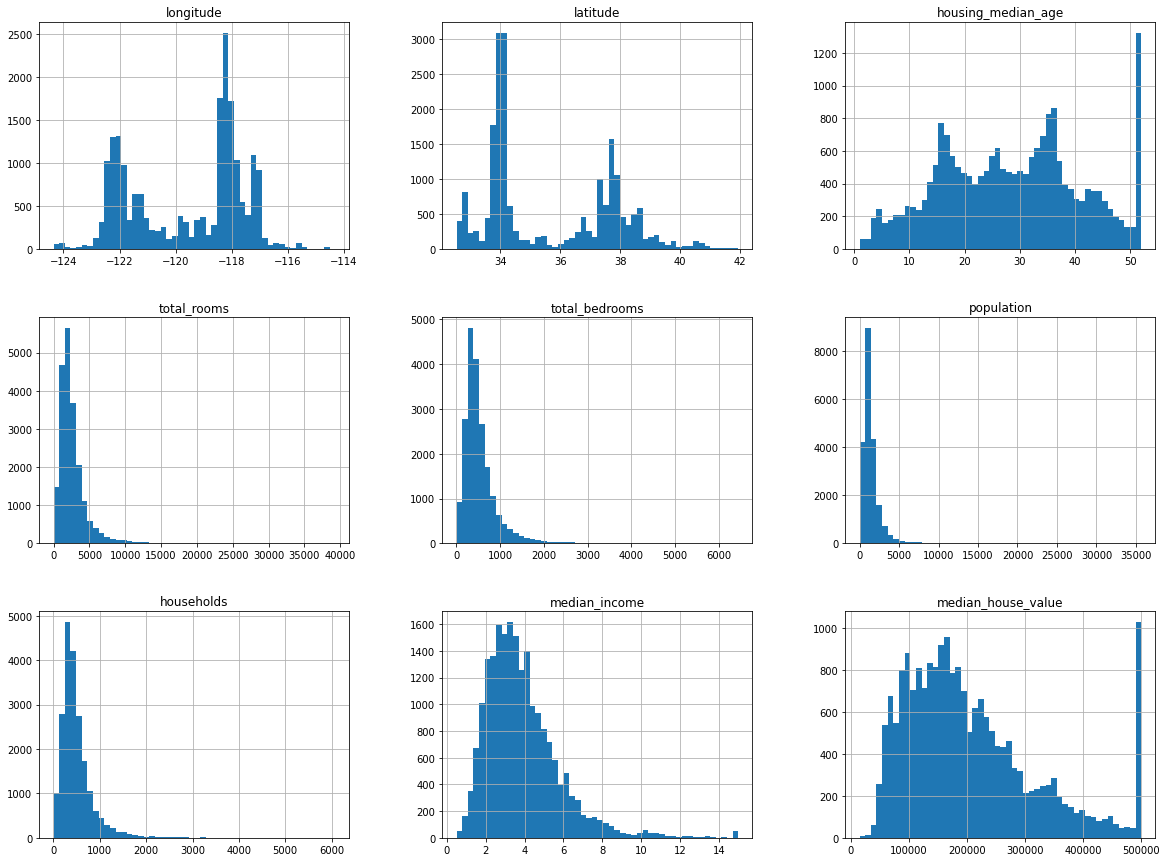

In [13]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Create a Test Set

In [14]:
import numpy as np

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [17]:
housing['income_cat'] = pd.cut(x=housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

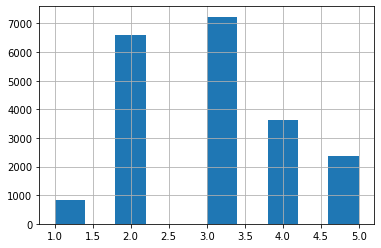

In [18]:
# visualize the categories
housing['income_cat'].hist()

Now we are ready to do stratified sampling based on income category:

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [21]:
for train_index, test_index in split.split(X=housing, y=housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Let's check if this worked as expected, we can start by checking the proportions of income categories in the test set:

In [22]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Now that we have a test set that is representative of `income_cat`'s distribution, it's time to remove it:

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## 3. Explore the Data

In [24]:
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

In [25]:
strat_test_set.reset_index().to_feather(path='data/01/strat_test_set.f')

**Create a copy of the training set for experimentation. Leave the original one alone at this moment.**

In [26]:
housing = strat_train_set.copy() 
housing.shape

(16512, 10)

### Looking for Correlations

In [27]:
housing[['population', 'median_house_value']].corr()

,population,median_house_value
population,1.000000,-0.026882
median_house_value,-0.026882,1.000000


In [28]:
corr_matrix = housing.corr()

In [29]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [30]:
from pandas.plotting import scatter_matrix

In [31]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

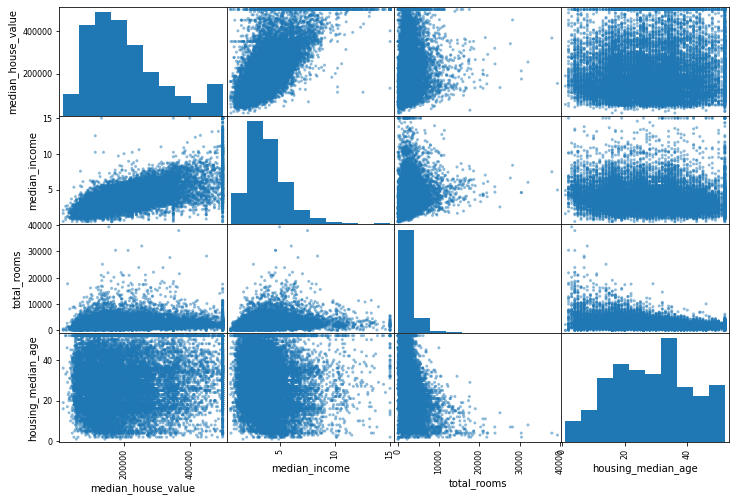

In [32]:
scatter_matrix(frame=housing[attributes], figsize=(12, 8))
plt.show()

The most interesting attribute to predict `median_house_value` is `median_income`

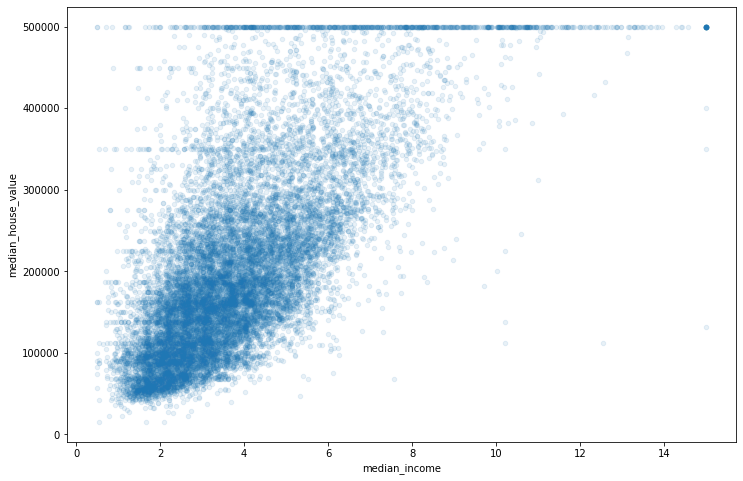

In [33]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,8), alpha=0.1)
plt.show()

### Experimenting with Attribute Combinations

We may want to transform tail heavy distributions using the logarithm function ($log(.)$).

We may want to combine some features in some cases. Examples:
- The number of rooms per household
- The ratio between bedrooms and all rooms
- The number of poeple per household

In [34]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

Let's look at the correlation matrix again:

In [35]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

We notice that `bedrooms_per_room` is much more correlated with `median_house_value`. meaning that the more expensive the house, the less the `bedrooms per room` ratio. `rooms_per_household` have a moderate positive correlation with `median_house_value`, the more expensive a house is, the more rooms it will have.

## 4. Data Preparation

In [36]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.shape, housing_labels.shape

((16512, 9), (16512,))

### Data Cleaning

Most machine learning algorithms cannot deal with missing features, so we need to handle missing data. For example, `total_bedrooms` have missing values, we have 3 options:
1. Get rid of the corresponding districts
    - `housing.dropna(subset='total_bedrooms')`
2. Get rid of the whole attribute (feature)
    - `housing.drop('total_bedrooms', axis=1)`
3. Set the missing values to some value (zero, mean, median, regressor preds,...)
    - `median = housing['total_bedrooms'].median()`
    - `housing['total_bedrooms'].fillna(median, inplace=True)`
    
We can also use `scikit-learn`'s `SimpleImputer`:

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imputer = SimpleImputer(strategy='median')

In [39]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [40]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has calculated the median of all attributes and stored them in `.statistics_`.

In [41]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [42]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Use the "trained or fitted" imputer to transform the numerical attributes by replacing missing values with their corresponding medians:

In [43]:
X = imputer.transform(housing_num)
X.shape

(16512, 8)

Put the array back into a Pandas DataFrame

In [44]:
housing_tr = pd.DataFrame(data=X, index=housing_num.index, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


### Handling Text & Categorical Attributes

Previous steps can only deal with numerical attributes. We need different approaches for text/categorical attributes.

In [45]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [46]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

Convert the text into **ordinal categorical** numbers

In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [48]:
ordinal_encoder = OrdinalEncoder()

In [49]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.values)
housing_cat_encoded.shape

(16512, 1)

In [50]:
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

We can get the list of categories using the `categories_` attribute of the `OrdinalEncoder`:

In [51]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that the machine learning algorithms may use these values as numbers even though they are simply labels. To fix this issue, we create one binary attribute per category, the so-called one-hot encoding.

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
one_hot_encoder = OneHotEncoder()

In [54]:
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat.values)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [55]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [56]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

If a categorical feature has a large number of possible values (ex. country, zipcode, city, ...) then a 1-hot encoder will result in a large number of input features. This may slow down training and degrade performance.

We may want to replace the categorical inputs with numerical features that relate to the categorical values. Examples:
- Replace country with its GDP/Area/Population
- Replace `ocean_proximity` with `distance_to_ocean`.

### Custom Transformers

Although `scikit-learn` provide many useful transformers, we will need to write our own for custom tasks such as data cleanup or feature engineering. Here is a small transformer that adds the combined attributes discussed earlier:

In [57]:
from sklearn.base import TransformerMixin, BaseEstimator
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """Engineers new features from existing ones: `rooms_per_household`, `population_per_household`, `bedrooms_per_room`
    
    # Arguments:
        add_bedrooms_per_room, bool: defaults to True. Indicates if we want to add the feature `bedrooms_per_room`.
    """
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # We don't have any internal parameters. Only interested in transforming data.
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling

With few exceptions (e.g., decision trees), ML algorithms don't perform well on data features that have different scales. However, scaling the target value is generally not required.

There are two ways to get all features to have the same scale:
- `Min-Max` scaling: for each value, we subtract by the `min` and divide by `max - min`.
- `Standarization`: For each value, we subtract the `mean` and divide by `std`

Standardization produce values with a mean of `0` and a standard deviation of `1`. Unlike Min-Max scaling, standardization doesn't bound values to a specific range. This can cause problems for some ML algorithms (Example: NNs usually expect inputs range from 0 to 1). However, standarization is much less effected by outliers.

As with all transformers, It's important to fit to the training data only, not the full dataset.

### Transformation Pipelines

There can be multiple transformation steps that need to be executed in the right order. Scikit-learn provides the `Pipeline` class to help us chain transformations in a sequence.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [59]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [60]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 11)

So far, we have handled categorical/continuous columns separately. It would be better if we had a single transformer that is able to transform all columns. For that purpose, we can use `ColumnTransformer`. 

In [61]:
from sklearn.compose import ColumnTransformer

In [62]:
num_attribs = housing_num.columns.tolist()
cat_attribs = ["ocean_proximity"]

In [63]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [64]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

## 5. Select & Train a Model

### Training & Evaluating on the Training Set

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lin_reg = LinearRegression()

In [67]:
lin_reg.fit(X=housing_prepared, y=housing_labels)

LinearRegression()

In [68]:
some_data = housing.iloc[:5]

In [69]:
some_labels = housing_labels.iloc[:5]

In [70]:
some_data_prepared = full_pipeline.transform(some_data)

In [71]:
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [72]:
print("Labels: ", some_labels.tolist())

Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Measure the performance of the model

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
housing_predictions = lin_reg.predict(housing_prepared)

In [75]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [76]:
lin_rmse = np.sqrt(lin_mse)
print("%.1f" %lin_rmse)

68627.9


Most districts median housing values range between 120K to 265K, so an average error of 68K is not good. We could try to input more features, or test a more powerful model, for instance, `DecisionTreeRegressor`.

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
tree_reg = DecisionTreeRegressor()

In [79]:
tree_reg.fit(X=housing_prepared, y=housing_labels)

DecisionTreeRegressor()

In [80]:
housing_predictions = tree_reg.predict(housing_prepared)

In [81]:
tree_mse = mean_squared_error(y_true=housing_labels, y_pred=housing_predictions)

In [82]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

It is either the model is absolutely perfect, or it badly overfit the data. To figure that out, the solution is to partition the training data, extract a validation set, and evaluate the performance of the model again.

### Cross-Validation
In K-fold cross-validation, we randomly split the training data into `k` folds, iteratively train the model on `k-1` folds and evaluate on 1, doing this `k` times. We often perform 10-fold cross-validation.

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
scores = cross_val_score(estimator=tree_reg, X=housing_prepared, 
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [85]:
tree_rmse_scores = np.sqrt(-scores)

In [86]:
def display_scores(scores):
    """Displays the scores, their mean, and the standard deviation.
    
    # Arguments:
        scores, np.array: list of scores given by the cross validation procedure.
    """
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [87]:
display_scores(tree_rmse_scores)

Scores: [72769.30789217 71036.84912906 69243.67862471 70940.55525959
 69958.72322287 77747.50406401 69968.6159146  72675.89085196
 68760.97485606 70907.92070148]
Mean: 71401.0020516503
Standard Deviation: 2451.920148862008


Compute the same scores for the linear regression model:

In [88]:
scores = cross_val_score(estimator=lin_reg, X=housing_prepared, 
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [89]:
lin_rmse_scores = np.sqrt(-scores)

In [90]:
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard Deviation: 2880.328209818065


The decision tree model is overfitting so badly that it performs worse than the linear regression model.

Let's try one more model, the random forest regressor. 

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
forest_reg = RandomForestRegressor()

In [93]:
forest_reg.fit(X=housing_prepared, y=housing_labels)

RandomForestRegressor()

In [94]:
forest_mse = mean_squared_error(y_true=housing_labels, y_pred=forest_reg.predict(X=housing_prepared))

In [95]:
forest_rmse = np.sqrt(forest_mse)
print("%.1f" % forest_rmse)

18697.1


In [96]:
scores = cross_val_score(estimator=forest_reg, X=housing_prepared, 
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [97]:
forest_rmse_scores = np.sqrt(-scores)

In [98]:
display_scores(scores=forest_rmse_scores)

Scores: [51364.52207609 49007.78589843 46847.07761837 51944.72165478
 47576.50534054 52145.85659387 52563.87232262 50259.66191863
 48691.55478886 53876.21710762]
Mean: 50427.77753198134
Standard Deviation: 2204.4345177506243


This is much better, random forests seem very promissing. We should notice, however, that the RMSE on the training set is still much lower then the validation RMSE, meaning the model overfitted, but not as badly as the decision tree model. Possible solutions to overfitting are:
- Getting more training data
- Simplifying the model
- Regularizing the model

## 6. Fine-Tune Your Model

After we have a short list of promising models, we can fine-tune these models to determine the one with the best result.

### Grid Search

scikit-learn's `GridSearchCV` can help us to test out all combinations of hyper-parameters and use cross-validation for evaluation.

In [99]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X=housing_prepared, y=housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [100]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [101]:
cvres = grid_search.cv_results_

In [102]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print("%.1f" % np.sqrt(-mean_score), end=', ')
    print(params)

63796.3, {'max_features': 2, 'n_estimators': 3}
55609.8, {'max_features': 2, 'n_estimators': 10}
52742.2, {'max_features': 2, 'n_estimators': 30}
59399.2, {'max_features': 4, 'n_estimators': 3}
52791.9, {'max_features': 4, 'n_estimators': 10}
50508.8, {'max_features': 4, 'n_estimators': 30}
58889.4, {'max_features': 6, 'n_estimators': 3}
52069.2, {'max_features': 6, 'n_estimators': 10}
50080.6, {'max_features': 6, 'n_estimators': 30}
58870.3, {'max_features': 8, 'n_estimators': 3}
52381.4, {'max_features': 8, 'n_estimators': 10}
50176.7, {'max_features': 8, 'n_estimators': 30}
62409.0, {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54260.5, {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59625.7, {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52693.8, {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
57064.5, {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51509.4, {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In this example, the best hyper-parameter combination is: `{'max_features': 6, 'n_estimators': 30}`. The model performs slightly better than a random forest with default hyper-parameters.

### Randomized Search

The grid search is fine when we explore a few hyper-parameter combinations. When the search space is big, it is better to use `RandomizedSearchCV` instead. It works almost in the same way of a grid search, but it try out a limited randomly selected number of hyper-paraemeters for each iteration. This approach has two main benefits:

- If we let this approach run for 1,000 iterations, it will explore 1,000 values for each hyper-parameters, instead of combining each unique value.
- By setting the number of iterations, we can control computing resources much more effectively than doing Grid search.

### Ensemble Methods

Another way to fine-tune the model is to combine the models that work best. Usually, the ensemble model will perform better than any part of the model, especially if its models are producing different errors.

### Analyze the best models & their errors

We will often gain good insights about the problem by inspecting good models. For example, the random forest model can give us estimates over feature importance:

### Evaluate your system on the test set

After tweaking the system for a while, we finally have a model that can be evaluated on the test set. There is nothing special about this process, we reproduce the same steps you used with training data to benchmark the model.

However, we should call `transform()`, and not `fit_transform()`.

In [103]:
final_model = grid_search.best_estimator_

In [104]:
X_test = strat_test_set.drop(labels='median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [105]:
X_test_prepared = full_pipeline.transform(X=X_test)

In [106]:
final_predictions = final_model.predict(X=X_test_prepared)

In [107]:
final_mse = mean_squared_error(y_true=y_test, y_pred=final_predictions)

In [108]:
final_rmse = np.sqrt(final_mse)
final_rmse

47822.64971917038

In some cases, such a point estimate of the generalization error won't be enough for us to launch it in production. We might want to create a confidence interval of 95% around the metric.

For this, we use the individual predictions for each test set element.

In [109]:
from scipy import stats

In [110]:
confidence = .95

In [111]:
squared_errors = (y_test - final_predictions) ** 2

In [112]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45856.98588621, 49710.64773021])

After tweaking the system for a while, we finally have a model that can be evaluated on the test set. There is nothing special about this process, we reproduce the same steps you used with training data to benchmark the model.

However, we should call `transform()`, and not `fit_transform()`.

Please note, if we do a lot of hyper-parameter fine-tuning, we will endup with a slightly worse performance on the test set because we will sometimes overfit to the changing validation set. This didn't happen now, but when it happens, resist the temptation to go back and do more fine-tuning to have better results for the test set.

If you want to improve your model, just start over again.

## 7. Present the Solution

Document what we have done

- The specific steps we have taken
- What worked and what did not
- What we have learned in this process
- Assumptions we made when we build the model.
- Limitations of our system

We should create a clear presentation with nice visualizations and simple-to-remember statements.

In this specific example, the machine learning method didn't actually beat the experts. They have the similar level of errors, but it is much more cost efficient than having a group of experts working on the same task. 